# Gaussian Mixture Models
Jeremiah Pratt

Due right before thanksgiving lol

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import multivariate_normal
import scipy.stats

In [2]:
#Function for generating 1 dimensional data
#Accepts n, the number of samples from each gaussian
def gen1D(n):
    
    stdevs = np.random.uniform(.25,.75,3)  #randomize the spreads
    
    g0 = np.random.normal(2,stdevs[0],n)
    g1 = np.random.normal(5,stdevs[1],n)
    g2 = np.random.normal(8,stdevs[2],n)
    
    g = np.append(g0,g1)
    g = np.append(g,g2)
    g = np.random.permutation(np.ravel(g))
    
    return g

In [3]:
#Applies the EM Algorithm on a data vector d,
#number of permutations n, and guessed mu, cov, and pi vectors.
def EMAlg(d,n,mus,sigs,pis):
    
    for i in range(n):
        
        resp0 = pis[0]*(scipy.stats.norm(mus[0],sigs[0]).pdf(d))   #individual responsibilities
        resp1 = pis[1]*(scipy.stats.norm(mus[1],sigs[1]).pdf(d))
        resp2 = pis[2]*(scipy.stats.norm(mus[2],sigs[2]).pdf(d))
        
        t = resp0 + resp1 + resp2
        
        w0 = resp0/t
        w1 = resp1/t
        w2 = resp2/t
    
        mus[0] = np.sum(d*w0)/np.sum(w0)      #mu update eqn
        mus[1] = np.sum(d*w1)/np.sum(w1)
        mus[2] = np.sum(d*w2)/np.sum(w2)
        
        sigs[0] = np.sum(w0*(d-mus[0]).T@(d-mus[0]))/np.sum(w0)   #sigma update eqn
        sigs[1] = np.sum(w1*(d-mus[1]).T@(d-mus[1]))/np.sum(w1)
        sigs[2] = np.sum(w2*(d-mus[2]).T@(d-mus[2]))/np.sum(w2)
        
        pis[0] = np.sum(w0)/len(d)    #pi update eqn
        pis[1] = np.sum(w1)/len(d)
        pis[2] = np.sum(w2)/len(d)
        
    return mus, sigs, pis

In [4]:
#Plots histogram of the data points
def plotHist(a,n,ax):
    ax.hist(a,bins=40,color='grey',normed=True)

In [5]:
#Plots pdfs of three gaussians
def plotPDFs(mu,sigma,ax):
    x = np.linspace(0,10,100)
    
    ax.plot(x,mlab.normpdf(x, mu[0], sigma[0]))
    ax.plot(x,mlab.normpdf(x, mu[1], sigma[1]))
    ax.plot(x,mlab.normpdf(x, mu[2], sigma[2]))

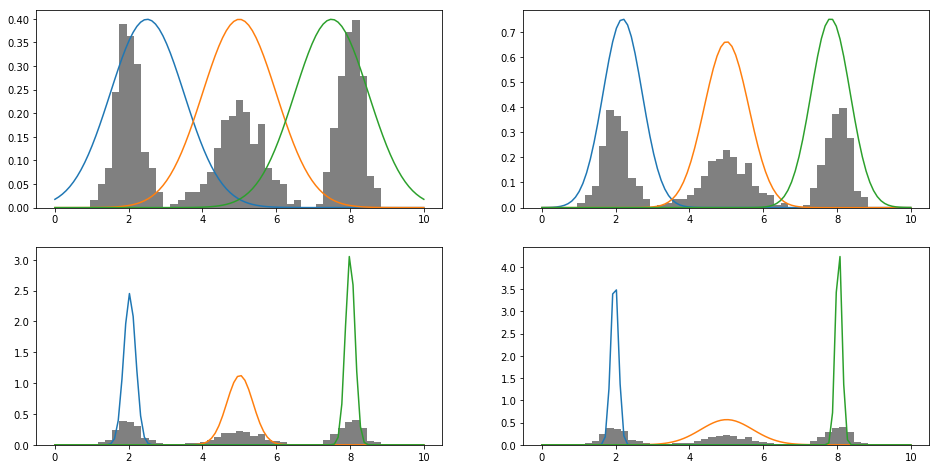

In [47]:
#Generation and plotting
n = 200      #num samples from each gaussian
g = gen1D(n)
figure, ax = plt.subplots(nrows=2, ncols=2, figsize=[16,8])

k = 3
muGuess = [2.5,5,7.5]         #hyperparams
sigGuess = [1,1,1]
piGuess = [.33,.33,.33]

plotPDFs(muGuess,sigGuess,ax[0,0])

mu1,sig1,pi1 = EMAlg(g,1,muGuess,sigGuess,piGuess)   #run algo once
plotPDFs(mu1,sig1,ax[0,1])
mu2,sig2,pi2 = EMAlg(g,1,mu1,sig1,pi1)       #run algo again
plotPDFs(mu2,sig2,ax[1,0])
mu10,sig10,pi10 = EMAlg(g,2,mu2,sig2,pi2)   #more algo runs
plotPDFs(mu10,sig10,ax[1,1])

plotHist(g,n,ax[0,0])
plotHist(g,n,ax[0,1])
plotHist(g,n,ax[1,0])
plotHist(g,n,ax[1,1])

plt.show()

# 2 Dimensional Gaussians

In [39]:
#Generating semi-random 2D gaussians
def gen2D(n):
    
    stdev0 = np.absolute(np.cov(np.random.normal(size=25),np.random.normal(size=25)))  #randomized stdevs
    stdev1 = np.absolute(np.cov(np.random.normal(size=25),np.random.normal(size=25)))
    stdev2 = np.absolute(np.cov(np.random.normal(size=25),np.random.normal(size=25)))
    
     
    g0 = np.random.multivariate_normal([2, 5],stdev0,n)
    g1 = np.random.multivariate_normal([5,2],stdev1,(int)(n*1.5))
    g2 = np.random.multivariate_normal([8.5,5.5],stdev2,(int)(n*.5))
    
    g = np.append(g0,g1,axis=0)
    g = np.append(g,g2,axis=0)
    np.random.shuffle(g)
    return g

In [53]:
#Applies the EM Algorithm on a data vector d,
#number of permutations n, and guessed mu, cov, and pi vectors.
def EMAlg2D(d,n,mus,sigs,pis):
    
    for i in range(n):
        
        resp0 = pis[0]*(multivariate_normal.pdf(d,mus[0],sigs[0]))
        resp1 = pis[1]*(multivariate_normal.pdf(d,mus[1],sigs[1]))
        resp2 = pis[2]*(multivariate_normal.pdf(d,mus[2],sigs[2]))
        
        t = resp0 + resp1 + resp2
        
        w0 = np.atleast_2d(resp0/t)
        w1 = np.atleast_2d(resp1/t)
        w2 = np.atleast_2d(resp2/t)

        mus[0] = np.sum(d*w0.T,axis=0)/np.sum(w0,axis=1)
        mus[1] = np.sum(d*w1.T,axis=0)/np.sum(w1,axis=1)
        mus[2] = np.sum(d*w2.T,axis=0)/np.sum(w2,axis=1)
        
        sigs[0] = np.absolute((w0*(d-mus[0]).T@(d-mus[0]))/np.sum(w0,axis=1))
        sigs[1] = np.absolute((w1*(d-mus[1]).T@(d-mus[1]))/np.sum(w1,axis=1))
        sigs[2] = np.absolute((w2*(d-mus[2]).T@(d-mus[2]))/np.sum(w2,axis=1))
        
        pis[0] = np.sum(w0)/len(d)
        pis[1] = np.sum(w1)/len(d)
        pis[2] = np.sum(w2)/len(d)
        
    return mus, sigs, pis

In [54]:
#Calculates one final responsibility and classifies each point
def classify(d,mus,sigs,pis,ax):
    
    resp0 = pis[0]*(multivariate_normal.pdf(d,mus[0],sigs[0]))
    resp1 = pis[1]*(multivariate_normal.pdf(d,mus[1],sigs[1]))
    resp2 = pis[2]*(multivariate_normal.pdf(d,mus[2],sigs[2]))
    
    t = resp0 + resp1 + resp2
    
    w0 = np.atleast_2d(resp0/t)
    w1 = np.atleast_2d(resp1/t)
    w2 = np.atleast_2d(resp2/t)
    
    w = np.append(w0,np.append(w1,w2,axis=0),axis=0)
    choices = np.argmax(w,axis=0)
    n = d.size/2
    for i in range((int)(n)):
        if choices[i] == 0:
            ax.scatter(d[i,0],d[i,1],color='r')
        elif choices[i] == 1:
            ax.scatter(d[i,0],d[i,1],color='g')
        else:
            ax.scatter(d[i,0],d[i,1],color='purple')

In [55]:
#Scatter Plot
def plotPoints(g,ax):
    ax.scatter(g[:,0],g[:,1],color='lightsteelblue')

In [56]:
#Plotting the resulting gaussians for each of the three guessed classes
def plotCircles(Mu,cov,ax):


    X, Y = np.mgrid[0:10:.1, 0:10:.1]
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    rv0 = multivariate_normal(Mu[0],cov[0])
    rv1 = multivariate_normal(Mu[1],cov[1])
    rv2 = multivariate_normal(Mu[2],cov[2])
    ax.contour(X, Y, rv0.pdf(pos), 1, colors='r')
    ax.contour(X, Y, rv1.pdf(pos), 1, colors='g')
    ax.contour(X, Y, rv2.pdf(pos), 1, colors='purple')

    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    
    return ax

[0.49748971732093689, 0.32404066031245565, 0.17846962236660749]


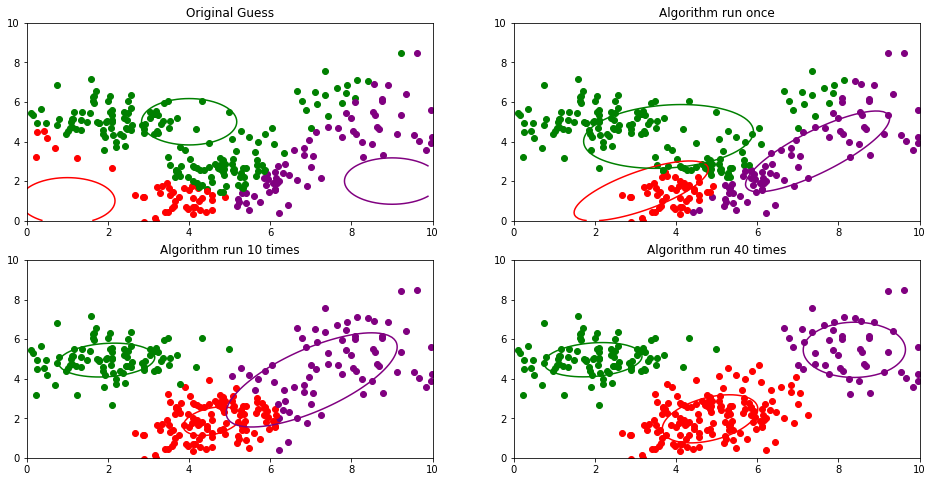

In [58]:
#Generation and plotting
g = gen2D(100)

figure, ax = plt.subplots(nrows=2, ncols=2, figsize=[16,8])
mu = [[1,1],[4,5],[9,2]]
sig = [[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]]]
pi = [.33,.33,.33]

#plotPoints(g,ax[0,0])
#plotPoints(g,ax[0,1])
#plotPoints(g,ax[1,0])
#plotPoints(g,ax[1,1])

plotCircles(mu,sig,ax[0,0])
classify(g,mu,sig,pi,ax[0,0])
mu1,sig1,pi1 = EMAlg2D(g,1,mu,sig,pi)
plotCircles(mu1,sig1,ax[0,1])
classify(g,mu1,sig1,pi1,ax[0,1])
mu10,sig10,pi10 = EMAlg2D(g,9,mu1,sig1,pi1)
plotCircles(mu10,sig10,ax[1,0])
classify(g,mu10,sig10,pi10,ax[1,0])
mu40,sig40,pi40 = EMAlg2D(g,30,mu10,sig10,pi10)
plotCircles(mu40,sig40,ax[1,1])
classify(g,mu40,sig40,pi40,ax[1,1])
print(pi40)

ax[0,0].set_title('Original Guess')
ax[0,1].set_title('Algorithm run once')
ax[1,0].set_title('Algorithm run 10 times')
ax[1,1].set_title('Algorithm run 40 times')


plt.show()